****ASSIGNMENT**** 2

Step 1: Data Loading and Exploration
Load the Dataset:

In [29]:
 import pandas as pd
data = pd.read_csv('/content/tips (data for regression problem).csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Basic Data Exploration:

In [8]:
# Check for missing values and data types
print(data.info())
# View basic statistics of the dataset
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


Step 2: Data Visualization and Linear Trend Analysis

Correlation Matrix (Heatmap):

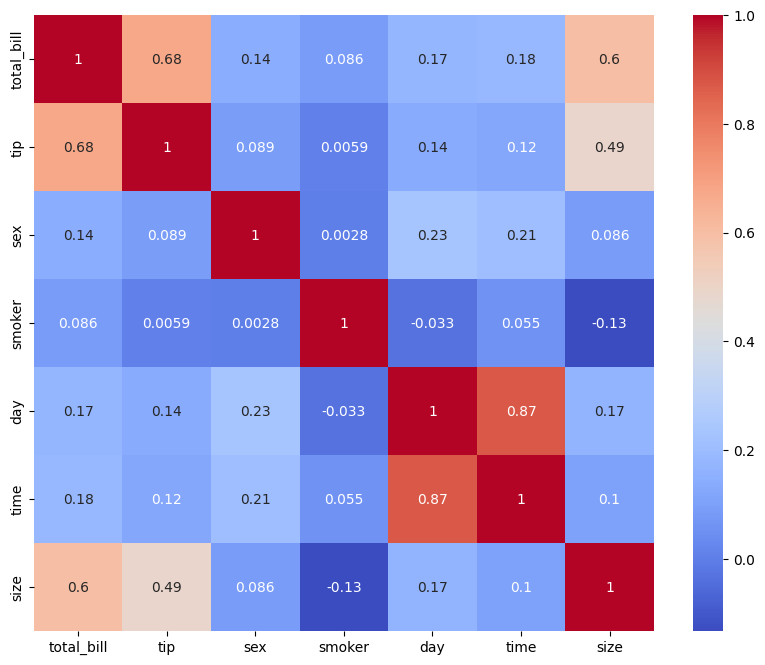

In [11]:
# Convert 'sex' and 'smoker' columns to numerical representations
data['sex'] = data['sex'].map({'Female': 0, 'Male': 1})
data['smoker'] = data['smoker'].map({'No': 0, 'Yes': 1})
data['day'] = data['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
data['time'] = data['time'].map({'Lunch': 0, 'Dinner': 1})


plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

##  1. Key Features Impacting Tip Amounts
Customer Billing
(Total Bill): Higher bills often correlate with higher tips since many customers tip as a percentage of the bill. This suggests that promotions encouraging higher spending could indirectly increase tip amounts.

Group Size or Party Size: Larger groups sometimes tip less per person, potentially due to "diffusion of responsibility" where individuals in larger groups feel less obliged to tip generously. Encouraging split billing in larger parties could increase tip fairness and accountability.

Scatter Plot: Plot features against the target variable (tip amount).

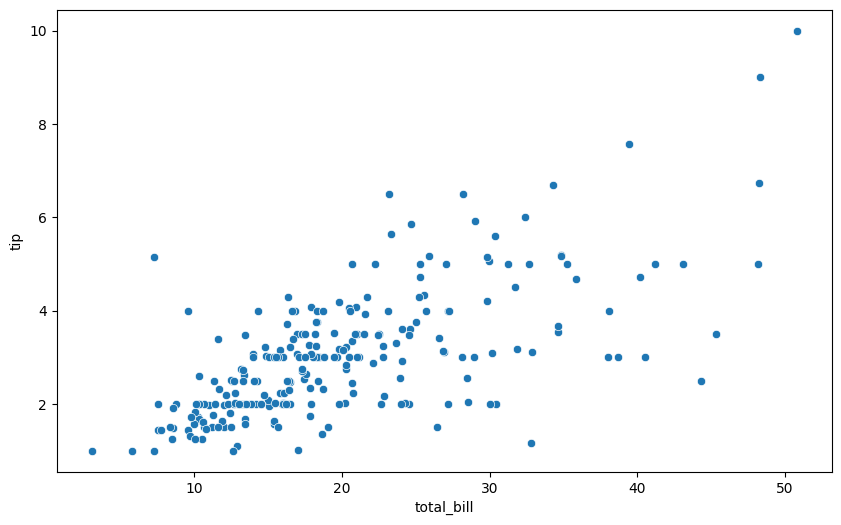

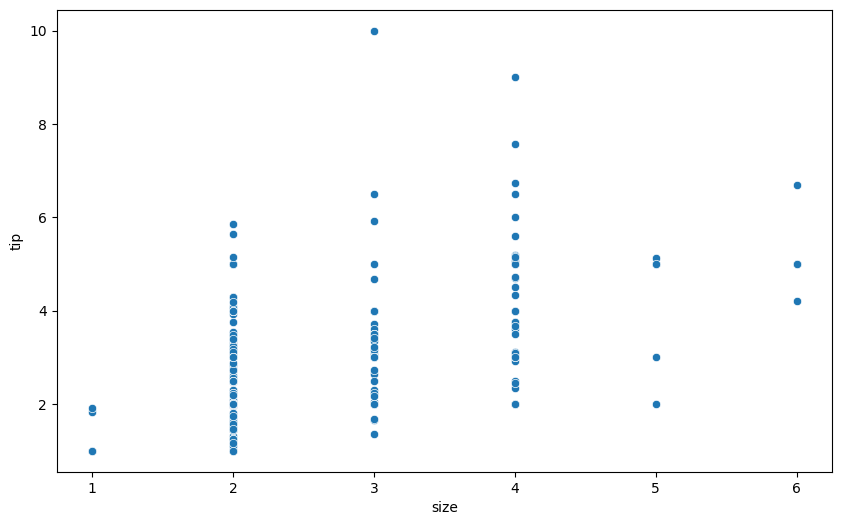

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='tip', data=data)
plt.show()

Pair Plot:

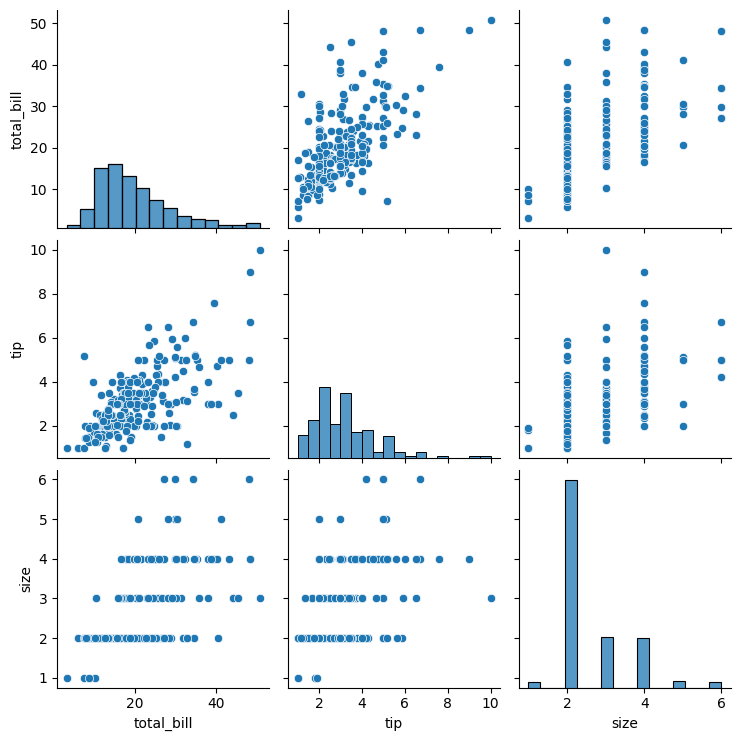

In [10]:
sns.pairplot(data)
plt.show()

Statistical Test for Linearity (Rainbow Test):

In [12]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

model = sm.OLS(data['tip'], sm.add_constant(data[['total_bill', 'size']]))
results = model.fit()
rainbow_stat, rainbow_p_value = linear_rainbow(results)
print('Rainbow test statistic:', rainbow_stat)
print('Rainbow test p-value:', rainbow_p_value)


Rainbow test statistic: 1.1902656646832817
Rainbow test p-value: 0.17048935693447634


Residual Plot:

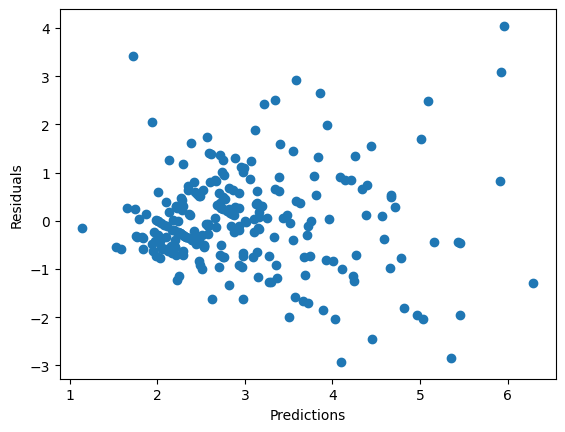

In [13]:
predictions = results.predict(sm.add_constant(data[['total_bill', 'size']]))
plt.scatter(predictions, results.resid)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()


 ## Step 3: Model Selection and Training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['total_bill', 'size']]
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print("Linear Regression R^2:", r2_score(y_test, y_pred))

Linear Regression R^2: 0.4811084097989491


Ridge and Lasso Regression:

In [15]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)


Decision Tree Regression:

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)


Ensemble Methods (Random Forest):

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


Support Vector Regression (SVR):

In [18]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)


K-Nearest Neighbors Regression (KNN):

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)


Step 4: Model Evaluation and Selection

Evaluate each model using metrics like Mean Squared Error (MSE) and R-squared:

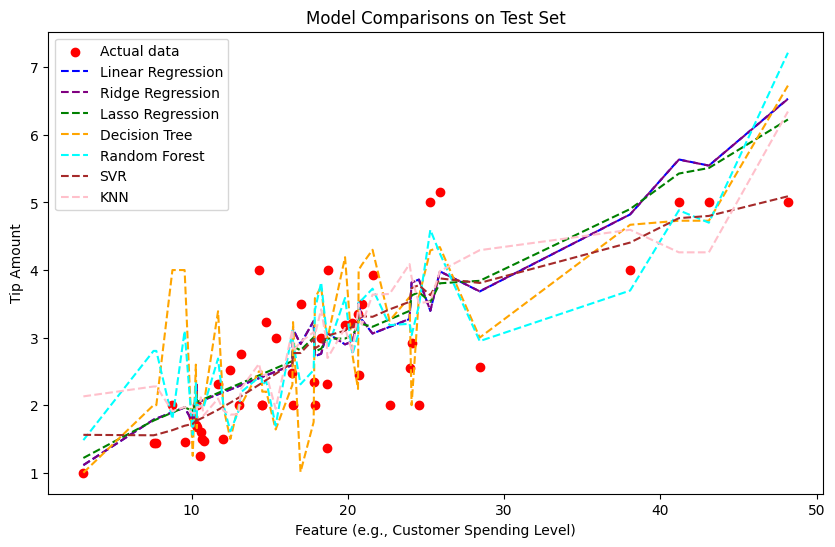

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Sort X_test and y_test
sorted_indices = np.argsort(X_test.iloc[:, 0])
X_test_sorted = X_test.iloc[sorted_indices, 0]  # Assuming you're only using the first feature
y_test_sorted = y_test.iloc[sorted_indices]

# Sort predictions based on the sorted indices
y_pred_sorted = y_pred[sorted_indices]
ridge_pred_sorted = ridge_pred[sorted_indices]
lasso_pred_sorted = lasso_pred[sorted_indices]
tree_pred_sorted = tree_pred[sorted_indices]
rf_pred_sorted = rf_pred[sorted_indices]
svr_pred_sorted = svr_pred[sorted_indices]
knn_pred_sorted = knn_pred[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test_sorted, y_test_sorted, color='red', label='Actual data')

# Plot each model's predictions on the sorted data
plt.plot(X_test_sorted, y_pred_sorted, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test_sorted, ridge_pred_sorted, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test_sorted, lasso_pred_sorted, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test_sorted, tree_pred_sorted, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test_sorted, rf_pred_sorted, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test_sorted, svr_pred_sorted, color='brown', label='SVR', linestyle='--')
plt.plot(X_test_sorted, knn_pred_sorted, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Test Set')
plt.xlabel('Feature (e.g., Customer Spending Level)')
plt.ylabel('Tip Amount')
plt.legend()
plt.show()


## 2. Insights for Improving Customer Service

Personalized Service for High-Spending Customers: By identifying high-spending customers (based on bill size and tipping history), you can offer enhanced service, such as priority seating or loyalty rewards, to encourage return visits and higher tips.

Staff Training on Customer Interactions: Since factors like group size and visit time impact tipping, training staff to provide excellent service consistently, regardless of group dynamics, can lead to better tips. Providing specific training for handling larger groups could also help.

**ALL R2 AND MSE SCORES**

In [21]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary to store model results
results = {
    'Model': [],
    'R2 Score': [],
    'MSE': []
}

# List of models and their predictions
models = {
    'Linear Regression': y_pred,
    'Ridge Regression': ridge_pred,
    'Lasso Regression': lasso_pred,
    'Decision Tree': tree_pred,
    'Random Forest': rf_pred,
    'Support Vector Regression (SVR)': svr_pred,
    'K-Nearest Neighbors (KNN)': knn_pred
}

# Calculate and store R2 score and MSE for each model
for model_name, predictions in models.items():
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    results['Model'].append(model_name)
    results['R2 Score'].append(r2)
    results['MSE'].append(mse)

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results)
results_df


,Model,R2 Score,MSE
0,Linear Regression,0.481108,0.648600
1,Ridge Regression,0.481883,0.647632
2,Lasso Regression,0.527307,0.590853
3,Decision Tree,0.123531,1.095561
4,Random Forest,0.394573,0.756767
5,Support Vector Regression (SVR),0.572197,0.534742
6,K-Nearest Neighbors (KNN),0.408443,0.739430


## **Check for the whole data**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


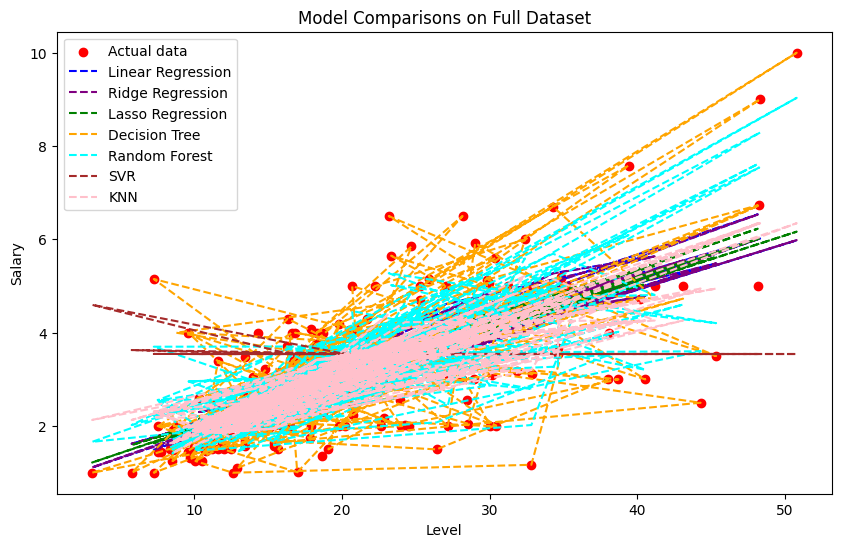

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svr_model.fit(X_train_scaled, y_train)  # SVR with scaled data
knn_model.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred_linear = linear_model.predict(X)
y_pred_ridge = ridge_model.predict(X)
y_pred_lasso = lasso_model.predict(X)
y_pred_tree = tree_model.predict(X)
y_pred_forest = rf_model.predict(X)
y_pred_svr = svr_model.predict(X) # Changed to predict on X, not X_train
y_pred_knn = knn_model.predict(X)

plt.figure(figsize=(10, 6))
# Assuming 'total_bill' is the feature you want to plot against
plt.scatter(X['total_bill'], y, color='red', label='Actual data') # Changed X to X['total_bill']

# Plot each model's predictions, also using 'total_bill' for x-axis
plt.plot(X['total_bill'], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X['total_bill'], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X['total_bill'], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X['total_bill'], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X['total_bill'], y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X['total_bill'], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X['total_bill'], y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Full Dataset')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

3. Revenue Management Strategies

Encourage Larger Bills through Targeted Upselling: Upselling higher-margin items or offering special promotions (e.g., "complete meal" options) could increase the total bill amount, indirectly increasing tip sizes.

Leverage Peak Hours: Understanding tipping patterns by time and day allows for optimized staff allocation, ensuring that experienced staff members are present during peak tipping periods to maximize customer satisfaction and revenue.

Loyalty Programs Based on Tip Patterns: Offering loyalty points or discounts for regular customers who tip generously could build stronger customer relationships and encourage repeat visits, contributing to sustained revenue growth.